# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The columns of the dataset are listed below with their respective significance.

**id**                    -  unique id of the movie

**imdb_id**               -  id of the movie by IMDB

**popularity**            -  popularity score of the movie

**budget**                -  budget used to make the movie

**revenue**               -  revenue brought in by the movie

**original_title**        -  movie title

**cast**                  -  list/names of actors in the movie

**homepage**              -  website of the movie

**director**              -  person who directed the movie

**tagline**               -  movie's advertising slogan

**keywords**              -  words to easily find a movie title 

**overview**              -  summary of movie storyline

**runtime**               -  total time of the movie

**genres**                -  categorization of movie based on plot, story etc.

**production_companies**  -  production company of movie

**release_date**          -  date of release

**vote_count**            -  total number of votes

**vote_average**          -  average rating of votes

**release_year**          -  year of movie release

**budget_adj**            -  budget adjustment due to inflation

**revenue_adj**           -  revenue adjustment due to inflation


### Questions for Analysis


The following questions will be explored and analysed in this report.

1. Are very popular movies high revenue/grossing movies?
2. Do movies with high budgets get the highest revenues?
3. Do lower user ratings translate to low revenues for movies?
4. How has movie revenue changed over the years? 
5. How has movie popularity changed over the years?
6. How has movie budget evolved over the years?
7. Which years were most profitable for movies?


In [1]:
# Import all necessary packages (Numpy, Pandas, Matplotlib and Seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [10]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01   12% |████                            | 1.3MB 22.2MB/s eta 0:00:01    23% |███████▋                        | 2.5MB 24.0MB/s eta 0:00:01    39% |████████████▊                   | 4.2MB 17.4MB/s eta 0:00:01    49% |███████████████▊                | 5.2MB 24.8MB/s eta 0:00:01    60% |███████████████████▌            | 6.4MB 26.5MB/s eta 0:00:01    78% |█████████████████████████▎      | 8.2MB 14.7MB/s eta 0:00:01    87% |████████████████████████████    | 9.1MB 17.7MB/s eta 0:00:01    95% |██████████████████████████████▋ | 10.0MB 18.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   25% |████████▏                       | 3.4MB 18.0MB/s eta 0:00:01    50% |████████████████                | 6.7MB 23.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#load TMDB movies dataset
df = pd.read_csv('tmdb_movies.csv')

#inspect few lines
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Show the size of dataframe (number of rows and columns)
df.shape

(10866, 21)

In [4]:
#Display information about the dataframe (column labels, data types and number of cells in with data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Shows brief statistical summary of features(columns) in dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

In the next few cells, I will be cleaning the data by dropping columns that I believe are not relevant to my analysis and also rows of missing data and converting datatypes where necessary.

In [6]:

#Drop columns that will not be used in analysis

df.drop(['id', 'imdb_id', 'cast', 'homepage', 'keywords', 'tagline', 'overview', 'original_title', 'runtime', 'director', 'production_companies'], axis=1, inplace=True)


In [7]:
#check shape of dataframe after dropping columns
df.shape

(10866, 10)

In [8]:
#check dataframe information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


In [9]:
df.isnull().sum()

popularity       0
budget           0
revenue          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

The df.info() and df.isnull().sum() shows that genres column is missing some data in some rows. Therefore, we will drop those rows too.

In [10]:
#Drop null rows from dataframe
df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

0

There are no null values in the dataframe. Let's finally check for duplicates and drop any duplicates we may find.

In [12]:
sum(df.duplicated())

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
sum(df.duplicated())

0

Let's finally run df.info() and df.describe() again

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
genres          10842 non-null object
release_date    10842 non-null object
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.7+ KB


In [16]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It looks like the min, 25% and 50% are returning zeros which look like errors. it is likely that there are so many zeros for budget and revenue in the dataframe and this is very unlikely for movies. To continue I'll drop all the rows with zero.

In [17]:
df = df.replace(0, np.nan)
df = df.dropna()

Let's run df.info() and df.describe() one last time to complete our data cleaning process

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity      3854 non-null float64
budget          3854 non-null float64
revenue         3854 non-null float64
genres          3854 non-null object
release_date    3854 non-null object
vote_count      3854 non-null int64
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 331.2+ KB


In [19]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [20]:
df.shape

(3854, 10)

In [21]:
#Resetting the index to make the numbering correct
df = df.reset_index(drop=True)

Before we confirm if the index has been reset correctly, **let's create a simple function that will display few values at both ends of the TMDB dataframe.** This can now help us not to run df.tail() and df.head() individually all the time.

In [22]:
#This function when called anytime will display both df.head() and df.tail() together.

def df_ends(df, x=5):
    return df.head(x).append(df.tail(x))

In [24]:
#Now let's call our new function 'df_ends' to confirm that the index has been reset correctly. We will display 2 values each.

df_ends(df,2)

,popularity,budget,revenue,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
3852,0.299911,12000000.0,2.000000e+07,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
3853,0.207257,5115000.0,1.200000e+07,Adventure|Science Fiction,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07


Yes, our function works great!

Our data cleaning process is complete. All NaN values, duplicates and columns that are not relevant have been dropped. We also dropped rows for budget and revenue which had zeros as it is unlikely that this is possible in real life scenario and we would want to analyse data where those values for said columns are not zero.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which features can be most associated with high revenue?)
**Sub questions:**
1. Are very popular movies high revenue/grossing movies?
2. Do movies with high budgets get the highest revenues?
3. Do lower user ratings translate to low revenues for movies?


**Please note that for the purposes of the exploratory data analysis,** the columns 'revenue_adj' and 'budget_adj' will be used as revenue and budget values respectively and not 'revenue' and 'budget' columns.

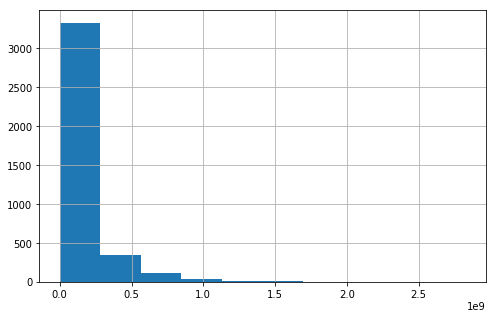

In [25]:
# Explore the revenue_adj feature using a histogram and dataframe.describe()

df.revenue_adj.hist(figsize = (8, 5));

The revenue_adj histogram appears very skewed to the right

Let's quickly explore the relationship between revenue_adj and a few features using the scatter diagram.

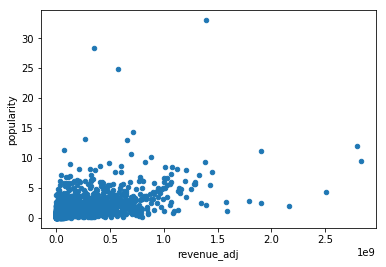

In [26]:
df.plot(x = 'revenue_adj', y = 'popularity', kind = 'scatter');

It looks like popularity for most movies is low regardless of revenue. This will however be explored in more details.

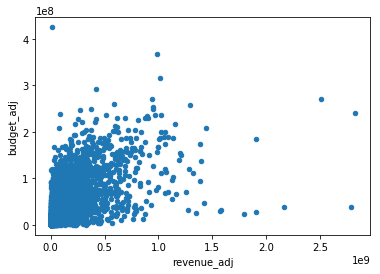

In [27]:
df.plot(x = 'revenue_adj', y = 'budget_adj', kind = 'scatter');

From initial observations, it looks like bugdet largely has a positive correlation with revenue.

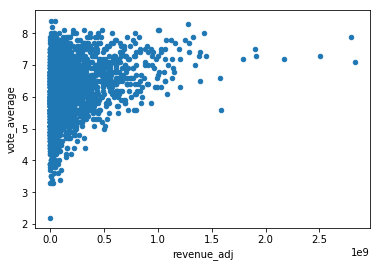

In [28]:
df.plot(x = 'revenue_adj', y = 'vote_average', kind = 'scatter');

From initial observations, it looks like vote_average (user ratings) has a weak correlation with revenue. We will need to do more detailed exploration.

In [29]:
#Statistics of revenue feature

df.revenue_adj.describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

**Level of movie revenue:**

High: 75% to max

Moderately High: 50% to 75%

Medium: 25% to 50%

Low: min to 25%

In [30]:
# Cutting the data from revenue_adj into groups from the describe results
bin_edges = [2.370705e+00, 1.835735e+07, 6.173068e+07, 1.632577e+08, 2.827124e+09]

We are grouping the revenue_adj data to create a new feature.

In [31]:
# We create labels for the four different revenue levels and name each revenue level
bin_names = ['low', 'medium', 'moderately high', 'high']

The new feature will need new values as found in the cell above.

In [32]:
# Creates revenue_levels column
df['revenue_levels'] = pd.cut(df['revenue_adj'], bin_edges, labels=bin_names)



We have successfully created a new column called 'revenue_levels' where 'revenue_adj' values have been categorised in terms of high, moderately high, medium and low.

In [35]:
#Let's check if the revenue_levels column is showing 

df_ends(df,2)

,popularity,budget,revenue,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,28.419936,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
3852,0.299911,12000000.0,2.000000e+07,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,moderately high
3853,0.207257,5115000.0,1.200000e+07,Adventure|Science Fiction,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,moderately high


**Now let's use groupby to do more exploration of revenue levels with the following features; vote_average, popularity and budget_adj**

In [36]:
# So we will first find the mean popularity of each revenue level with groupby
df.groupby('revenue_levels')['popularity'].mean()

revenue_levels
low                0.559361
medium             0.808519
moderately high    1.148874
high               2.249021
Name: popularity, dtype: float64

We see that the level of revenue that receives the highest mean popularity score is 'high'

In [37]:
# Next, we will find the mean user rating/vote_average of each revenue level with groupby
df.groupby('revenue_levels')['vote_average'].mean()

revenue_levels
low                5.958299
medium             6.066355
moderately high    6.188681
high               6.459232
Name: vote_average, dtype: float64

We see that the level of revenue that receives the highest mean vote average is 'high'

In [38]:
# Finally, we will find the mean budget of each revenue level with groupby
df.groupby('revenue_levels')['budget_adj'].mean()

revenue_levels
low                1.599161e+07
medium             2.947073e+07
moderately high    4.449050e+07
high               8.699208e+07
Name: budget_adj, dtype: float64

Again, we see that the level of revenue with the highest mean budget is 'high'

**Let's explore both revenue level means and budget means, popularity means and vote average means again using Matplotlib visualisation.**

**Let's create more plots using Matplotlib** 

In [39]:
revenue_levels_means = df.groupby('revenue_levels')['budget_adj'].mean()

Text(0,0.5,'Mean of revenue levels')

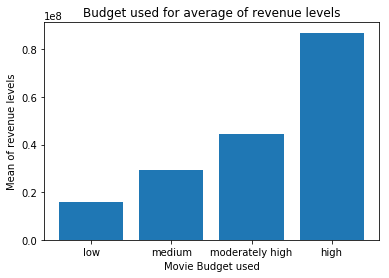

In [40]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = revenue_levels_means
labels = ['low', 'medium', 'moderately high', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Budget used for average of revenue levels')
plt.xlabel('Movie Budget used')
plt.ylabel('Mean of revenue levels')

From the plot above, we see that averagely higher budget movies are associated with higher revenue levels.

In [41]:
revenue_levels_means1 = df.groupby('revenue_levels')['popularity'].mean()

Text(0,0.5,'Mean of revenue levels')

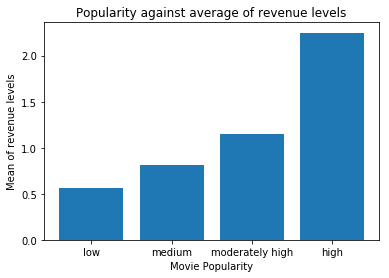

In [42]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = revenue_levels_means1
labels = ['low', 'medium', 'moderately high', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Popularity against average of revenue levels')
plt.xlabel('Movie Popularity')
plt.ylabel('Mean of revenue levels')

We observe from the plot above that averagely high revenue level movies seem to be associated with high popularity. 

In [43]:
revenue_levels_means2 = df.groupby('revenue_levels')['vote_average'].mean()

Text(0,0.5,'Mean of revenue levels')

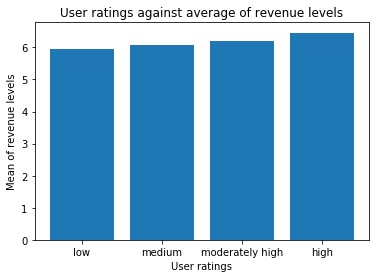

In [44]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = revenue_levels_means2
labels = ['low', 'medium', 'moderately high', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('User ratings against average of revenue levels')
plt.xlabel('User ratings')
plt.ylabel('Mean of revenue levels')

We observe that the revenue levels doesn't seem to be affected by user ratings. 

**This marks the end of the first major part of our data exploration.**

### Research Question 2  (How has movie success changed over the years?

**Sub questions:**

1. How has movie revenue changed over the years?
2. How has movie budgets changed over the years?
2. How has popularity changed over the years?
3. Which years were most profitable for movies?

**We shall use histograms, scatter plots and bar charts to investigate the way movies have changed over the years in terms of budget, revenue, profit and popularity.**

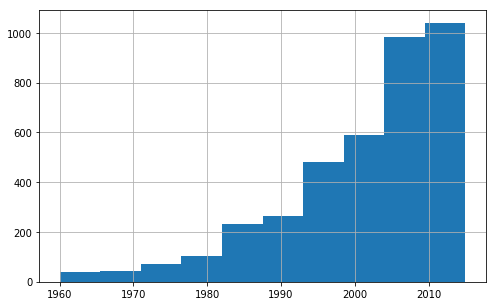

In [45]:
df.release_year.hist(figsize = (8, 5));

Firstly, we observe that the release year histogram is skewed to the left.

Let's create some scatter plots related to our questions

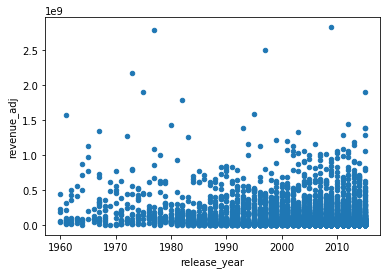

In [46]:
df.plot(x = 'release_year', y = 'revenue_adj', kind = 'scatter');

From the scatter plot it looks like revenue has increased overall between 1960s and 2010s. However, there were some individual years were revenue was very high.

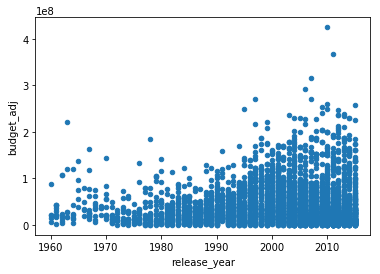

In [47]:
df.plot(x = 'release_year', y = 'budget_adj', kind = 'scatter');

From the scatter plot it looks like movie budget has also increased overall between 1960s and 2010s.

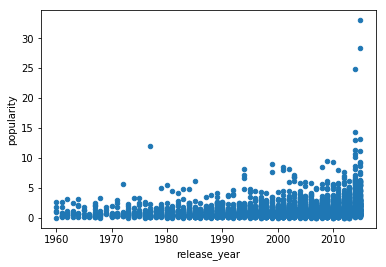

In [48]:
df.plot(x = 'release_year', y = 'popularity', kind = 'scatter');

The scatter plot shows there is a positive correlation between popluarity and the increase of years, although it appears the trend appears slow.

We have about 56 years of movie data. It will be much better to investigate the long term change over the years in terms of decades. For this we will need to group the years into decades and create a new column in the dataframe called 'decades'.

In [49]:
# Group/'cut' the years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]

In [50]:
# Label the new decades
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [51]:
# Create the new 'decade' column
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [52]:
df.head(2)

,popularity,budget,revenue,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels,decade
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high,2010s
1,28.419936,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high,2010s


Last two cells are for checking if our new column was successfully created. 

Let's plot a bar chart using Matplotlib to show correlation between Decades and Revenue

In [54]:
df.groupby('decade')['revenue_adj'].mean()

decade
1960s    2.842694e+08
1970s    2.567380e+08
1980s    1.274362e+08
1990s    1.380226e+08
2000s    1.225630e+08
2010s    1.330990e+08
Name: revenue_adj, dtype: float64

Text(0,0.5,'Revenue')

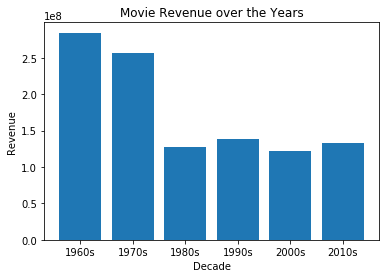

In [55]:
# We plot the bar chart to explore the mean revenue generated in the various decades
revenue_during_decade = df.groupby('decade')['revenue_adj'].mean()

plt.bar(revenue_during_decade.index, revenue_during_decade.values)
plt.title('Movie Revenue over the Years')
plt.xlabel('Decade')
plt.ylabel('Revenue')


From the bar chart above, we see that average movie revenue was highest in the 1960s and 1970s and has steadily come down to half of that over the rest of the decades.   

Let's plot a bar chart using Matplotlib to show correlation between Decades and Mean Budget used

In [56]:
df.groupby('decade')['budget_adj'].mean()

decade
1960s    4.546152e+07
1970s    2.851827e+07
1980s    2.957904e+07
1990s    4.988054e+07
2000s    4.766348e+07
2010s    4.271093e+07
Name: budget_adj, dtype: float64

Text(0,0.5,'Average Budget')

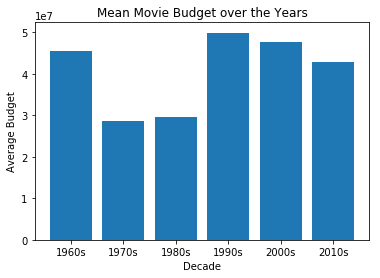

In [57]:
# We plot the bar chart to explore the mean budget used over the various decades
budget_during_decade = df.groupby('decade')['budget_adj'].mean()

plt.bar(budget_during_decade.index, budget_during_decade.values)
plt.title('Mean Movie Budget over the Years')
plt.xlabel('Decade')
plt.ylabel('Average Budget')

From the bar chart, we see that budget used has high in the 1960s, then it came low through the 1970s and 1980s and eventually went up in 1990s and is still high till 2010s although there is a very small decline between 1990s and 2010s.

Let's plot a bar chart using Matplotlib to show Average Popularity of movies over the Decades

In [58]:
df.groupby('decade')['popularity'].mean()

decade
1960s    0.900749
1970s    1.044932
1980s    0.848137
1990s    0.938220
2000s    1.082989
2010s    1.841155
Name: popularity, dtype: float64

Text(0,0.5,'Average Movie Popularity')

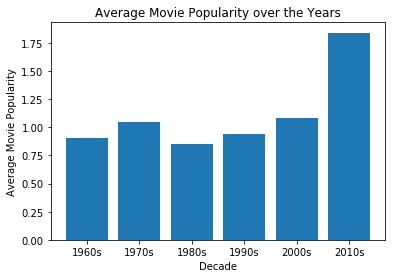

In [59]:
# We plot the bar chart to explore the mean budget used over the various decades
popularity_during_decade = df.groupby('decade')['popularity'].mean()

plt.bar(popularity_during_decade.index, popularity_during_decade.values)
plt.title('Average Movie Popularity over the Years')
plt.xlabel('Decade')
plt.ylabel('Average Movie Popularity')

We see from the chart above that movies have relatively maintained their popularity over the decades until the 2010s where they seem to have gone up.

**One more way we want to explore our data over the decades is in terms of profits made from the movies. We define profit here as 'revenue_adj - budget_adj'.**

Let's create a new column in the dataframe called 'profit'

In [60]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [62]:
#Let's confirm that the 'profit' column has been created.
df_ends(df,2)

,popularity,budget,revenue,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels,decade,profit
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high,2010s,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high,2010s,2.101614e+08
3852,0.299911,12000000.0,2.000000e+07,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,moderately high,1960s,5.374412e+07
3853,0.207257,5115000.0,1.200000e+07,Adventure|Science Fiction,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,moderately high,1960s,4.625353e+07


Let's plot a bar chart using Matplotlib to show Average Popularity of movies over the Decades

In [63]:
df.groupby('decade')['profit'].mean()

decade
1960s    2.388079e+08
1970s    2.282197e+08
1980s    9.785714e+07
1990s    8.814204e+07
2000s    7.489950e+07
2010s    9.038803e+07
Name: profit, dtype: float64

Text(0,0.5,'Average Profit')

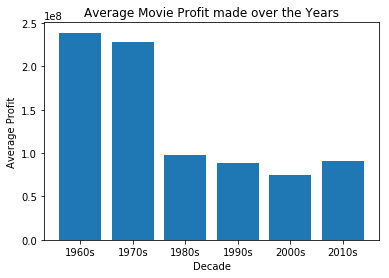

In [64]:
# We plot the bar chart to see the average profit made over the various decades
profit_during_decade = df.groupby('decade')['profit'].mean()

plt.bar(profit_during_decade.index, profit_during_decade.values)
plt.title('Average Movie Profit made over the Years')
plt.xlabel('Decade')
plt.ylabel('Average Profit')

From the plot above, the 1960s and 1970s look to have been the most profitable years for movies. The subsequent decades show even less than half of that average profit.

<a id='conclusions'></a>
## Conclusions


**Main question 1: Which features can be most associated with high revenue?** (1 to 3)


1. Are very popular movies high revenue/grossing movies?

> It can be deduced from the exploratory analysis that on average, higher revenue levels can be associated with slightly higher popularity levels.



2. Do movies with high budgets get the highest revenues?

> From the data exploration, we see that averagely, higher budget movies are associated with higher revenue levels.



3. Do lower user ratings translate to low revenues for movies?

> It can be inferred from the exploration of data that user ratings (vote average) does not directly influence the revenue levels of movies.




**Main question 2: How has movie success changed over the years?** (4 to 7)


4. How has movie revenue changed over the years? 

> The bar chart of average movie revenue for the various decades shows that average movie revenue was highest in the 1960s and 1970s and steadily came down to half of that over the rest of the decades.



5. How has movie popularity changed over the years?

> The exploratory analysis shows that movies have relatively maintained their popularity level over the decades until the 2010s where the popularity appears to have doubled.



6. How has movie budget evolved over the years?

> From the analysis, movie budget was high in the 1960s, then it came low through the 1970s and 1980s and eventually went up in 1990s and is still high till 2010s although there is a very small decline between 1990s and 2010s.



7. Which years were most profitable for movies?

> The analysis shows that the 1960s and 1970s look to have been the most profitable years for movies. The subsequent decades show even less than half of that average profit.




**Additional comments under conclusion**
> The genre column can be explored to investigate it's relationship with revenue levels as well as it's popularity over the decades.


### Limitations

1. The data had a lot of zero values and null values which resulted in deletion of many rows. Out of the initial 10866 rows of data, only 3854 was used in the analysis after cleaning. This may have resulted in loss of valuable data.


2. Although, budget_adj and revenue_adj were two of the main columns used in the dataframe for analysis, the currencies of the vlaues were not added. This means that the values may not be very accurate for analysis.



## Reference

1. https://pandas.pydata.org/docs/user_guide/index.html#user-guide

2. https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

3. https://classroom.udacity.com


Extra note: This updated .ipynb file has the specified change recommnended from the 1st review, which is the creation of a function.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_TMDB.ipynb'])

0